In [21]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
warnings.filterwarnings('ignore')


In [22]:
data = pd.read_csv('mouse.txt', sep=' ')

In [23]:
data.head(5)

,0.456601376346254,0.432806409224108
0,0.611378,0.528625
1,0.450299,0.711606
2,0.639015,0.460744
3,0.628957,0.323470
4,0.566210,0.289358


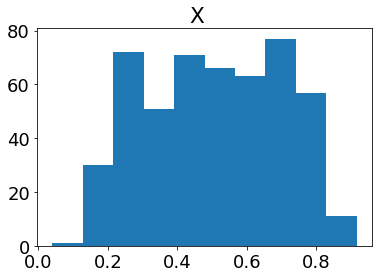

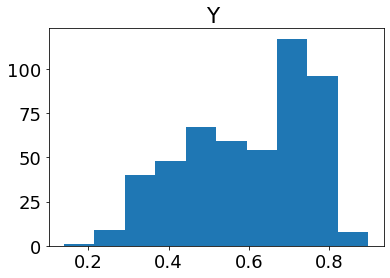

In [24]:
X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values


hist = plt.hist(X) 
plt.title("X  ")
plt.show()

hist = plt.hist(Y) 
plt.title("Y ")
plt.show()

In [25]:
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=4, 
                          bootstrap=False, n_jobs=-1, random_state=1)

In [26]:
model = IsolationForest()
#model.fit(data)
pred = model.fit_predict(data)
data['predictions'] =pred



In [27]:
#how many outliers were found
data['predictions'].value_counts()

 1    361
-1    138
Name: predictions, dtype: int64

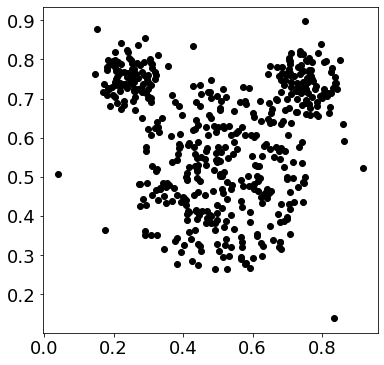

In [28]:
plt.figure(figsize=(6, 6))
plt.scatter(X,Y, c='k')
plt.rc('font', size=18) 
plt.show()

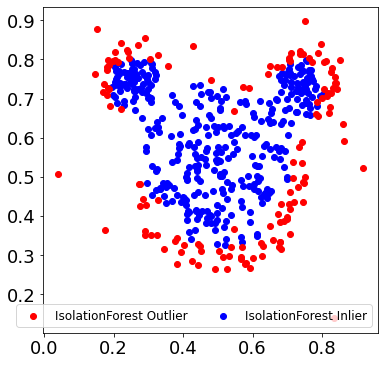

In [29]:
plt.figure(figsize=(6, 6))
for i in set(pred):
    if i ==-1:
        dbscan_outlier=plt.scatter(data.iloc[pred==i, 0], data.iloc[pred==i, 1], c='r')
    else:
        dbscan_inlier=plt.scatter(data.iloc[pred==i, 0], data.iloc[pred==i, 1], c='b')
plt.legend((dbscan_outlier,dbscan_inlier),('IsolationForest Outlier', 'IsolationForest Inlier'),scatterpoints=1, loc='lower right', ncol=3, fontsize=12)
plt.show()

In [41]:
data2 = pd.read_csv('creditcard.csv', sep=',')

In [42]:
data2.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
X = data2.iloc[:, 1:29].values
Y = data2.iloc[:, 30].values



In [59]:
s0 = data2.Class[data2.Class.eq(0)].sample(5000,replace=True).index
s1 = data2.Class[data2.Class.eq(1)].sample(frac =1).index 

datau = data2.loc[s0.union(s1)]

In [62]:
datau.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
55,38.0,0.158332,0.872687,0.965525,1.802127,0.139022,0.110863,0.559079,-0.029071,-0.394912,...,0.116270,0.691685,0.121113,0.116142,-1.112725,-0.303369,0.327533,0.255621,21.76,0
120,77.0,-1.185954,-0.218808,1.101005,-1.406997,1.261783,-0.337709,1.191747,-0.427383,0.276679,...,-0.362830,-0.418817,0.521401,-0.922427,-0.139840,0.709787,-0.076249,-0.383942,49.95,0
136,84.0,-0.792329,-0.840664,2.610465,-2.196338,-0.396962,-0.707363,-0.057934,-0.548676,-1.870127,...,-0.525187,-0.776454,-0.132811,0.376664,0.221800,-0.574396,-0.419351,-0.277906,21.97,0
150,93.0,-1.640014,-0.479831,1.613630,2.997979,-3.803788,5.051812,3.315254,-0.303785,0.671395,...,-0.367933,0.641891,-0.405779,-1.268700,0.494090,0.610967,0.608993,-0.410034,937.69,0
272,193.0,-0.922515,0.841577,2.078000,1.373071,0.666526,0.779012,0.609458,0.402369,-1.088371,...,-0.127425,-0.458043,-0.067387,-0.350802,0.039176,-0.291078,0.058607,0.089760,37.20,0


In [66]:
datau.drop("Time", inplace=True, axis=1)

In [67]:
datau.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
55,0.158332,0.872687,0.965525,1.802127,0.139022,0.110863,0.559079,-0.029071,-0.394912,0.032674,...,0.116270,0.691685,0.121113,0.116142,-1.112725,-0.303369,0.327533,0.255621,21.76,0
120,-1.185954,-0.218808,1.101005,-1.406997,1.261783,-0.337709,1.191747,-0.427383,0.276679,-0.215399,...,-0.362830,-0.418817,0.521401,-0.922427,-0.139840,0.709787,-0.076249,-0.383942,49.95,0
136,-0.792329,-0.840664,2.610465,-2.196338,-0.396962,-0.707363,-0.057934,-0.548676,-1.870127,1.030916,...,-0.525187,-0.776454,-0.132811,0.376664,0.221800,-0.574396,-0.419351,-0.277906,21.97,0
150,-1.640014,-0.479831,1.613630,2.997979,-3.803788,5.051812,3.315254,-0.303785,0.671395,0.744104,...,-0.367933,0.641891,-0.405779,-1.268700,0.494090,0.610967,0.608993,-0.410034,937.69,0
272,-0.922515,0.841577,2.078000,1.373071,0.666526,0.779012,0.609458,0.402369,-1.088371,-0.096632,...,-0.127425,-0.458043,-0.067387,-0.350802,0.039176,-0.291078,0.058607,0.089760,37.20,0


In [103]:
iforest = IsolationForest(n_estimators=500, max_samples='auto', 
                          contamination=0.05, max_features=30, 
                          bootstrap=False, n_jobs=-1, random_state=1)

In [104]:
model = IsolationForest()
#model.fit(data)
pred = model.fit_predict(datau)
datau['predictions'] =pred

In [105]:
#how many outliers were found
datau['predictions'].value_counts()

 1    5079
-1     413
Name: predictions, dtype: int64

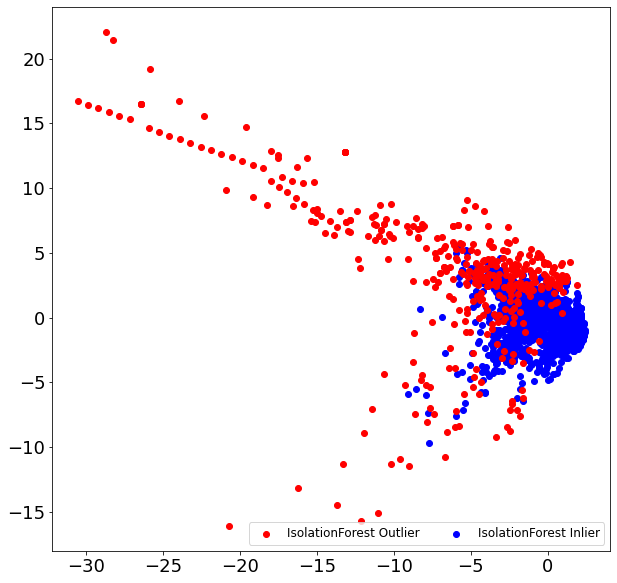

In [106]:
plt.figure(figsize=(10, 10))
for i in set(pred):
    if i ==-1:
        dbscan_outlier=plt.scatter(datau.iloc[pred==i, 0], datau.iloc[pred==i, 1], c='r')
    else:
        dbscan_inlier=plt.scatter(datau.iloc[pred==i, 0], datau.iloc[pred==i, 1], c='b')
plt.legend((dbscan_outlier,dbscan_inlier),('IsolationForest Outlier', 'IsolationForest Inlier'),scatterpoints=1, loc='lower right', ncol=3, fontsize=12)
plt.show()

In [119]:
X = datau.iloc[:, 1:29].values
Y = datau.iloc[:, 30].values

In [120]:
iforest = IsolationForest(n_estimators=len(X), max_samples='auto', 
                          contamination=0.05, max_features=29, 
                          bootstrap=False, n_jobs=-1, random_state=1)

In [121]:
model = IsolationForest()
#model.fit(data)
pred = model.fit_predict(X)
datau['predictions'] =pred

In [122]:
#how many outliers were found
datau['predictions'].value_counts()

 1    5130
-1     362
Name: predictions, dtype: int64

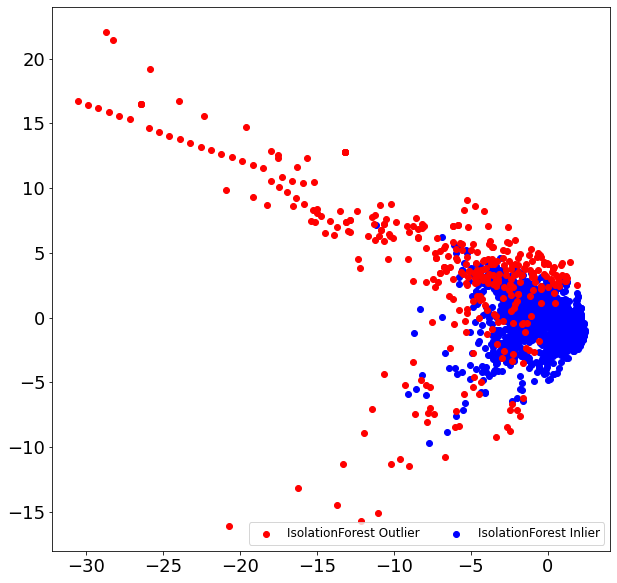

In [123]:
plt.figure(figsize=(10, 10))
for i in set(pred):
    if i ==-1:
        dbscan_outlier=plt.scatter(datau.iloc[pred==i, 0], datau.iloc[pred==i, 1], c='r')
    else:
        dbscan_inlier=plt.scatter(datau.iloc[pred==i, 0], datau.iloc[pred==i, 1], c='b')
plt.legend((dbscan_outlier,dbscan_inlier),('IsolationForest Outlier', 'IsolationForest Inlier'),scatterpoints=1, loc='lower right', ncol=3, fontsize=12)
plt.show()

In [125]:
from sklearn.metrics import confusion_matrix

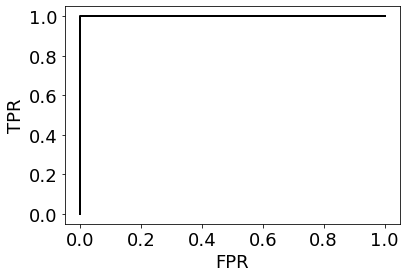

In [126]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y,pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

[[ 362    0]
 [   0 5130]]


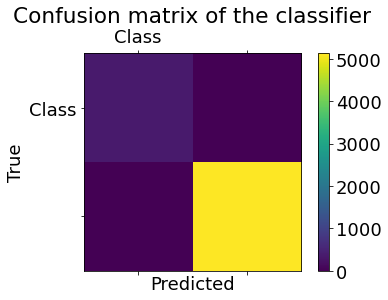

In [128]:
labels = ['Class']
cm = confusion_matrix(Y, pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()